# GROUP 1 - DHEEKSHITH , NINAD , MOUNEESH , MAHITH

PROBLEM STATEMENT - Predicting Banking Loan Defaults

In [4]:
pip install xgboost

### Importing the Libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer , SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler, OneHotEncoder

from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.metrics import (accuracy_score, classification_report,
confusion_matrix, roc_auc_score, average_precision_score ,roc_curve,auc,precision_recall_curve)

import xgboost as xgb
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

### Importing the Dataset

In [6]:
df = pd.read_csv("./Loan_Default.csv")

In [7]:
df.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

In [9]:
df.describe()

,ID,year,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
count,148670.000000,148670.0,1.486700e+05,112231.000000,112031.000000,109028.000000,148629.000000,1.335720e+05,139520.000000,148670.000000,133572.000000,148670.000000,124549.000000
mean,99224.500000,2019.0,3.311177e+05,4.045476,0.441656,3224.996127,335.136582,4.978935e+05,6957.338876,699.789103,72.746457,0.246445,37.732932
std,42917.476598,0.0,1.839093e+05,0.561391,0.513043,3251.121510,58.409084,3.599353e+05,6496.586382,115.875857,39.967603,0.430942,10.545435
min,24890.000000,2019.0,1.650000e+04,0.000000,-3.638000,0.000000,96.000000,8.000000e+03,0.000000,500.000000,0.967478,0.000000,5.000000
25%,62057.250000,2019.0,1.965000e+05,3.625000,0.076000,581.490000,360.000000,2.680000e+05,3720.000000,599.000000,60.474860,0.000000,31.000000
50%,99224.500000,2019.0,2.965000e+05,3.990000,0.390400,2596.450000,360.000000,4.180000e+05,5760.000000,699.000000,75.135870,0.000000,39.000000
75%,136391.750000,2019.0,4.365000e+05,4.375000,0.775400,4812.500000,360.000000,6.280000e+05,8520.000000,800.000000,86.184211,0.000000,45.000000
max,173559.000000,2019.0,3.576500e+06,8.000000,3.357000,60000.000000,360.000000,1.650800e+07,578580.000000,900.000000,7831.250000,1.000000,61.000000


In [10]:
df.describe(include=['object'])

,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,Neg_ammortization,interest_only,...,construction_type,occupancy_type,Secured_by,total_units,credit_type,co-applicant_credit_type,age,submission_of_application,Region,Security_Type
count,145326,148670,147762,148670,148536,148670,148670,148670,148549,148670,...,148670,148670,148670,148670,148670,148670,148470,148470,148670,148670
unique,2,4,2,3,4,2,2,2,2,2,...,2,3,2,4,4,2,7,2,4,2
top,cf,Male,nopre,type1,p3,l1,nopc,nob/c,not_neg,not_int,...,sb,pr,home,1U,CIB,CIB,45-54,to_inst,North,direct
freq,135348,42346,124621,113173,55934,142344,148114,127908,133420,141560,...,148637,138201,148637,146480,48152,74392,34720,95814,74722,148637


In [11]:
print(f"The data set has {df.shape[0]} rows and {df.shape[1]} columns.")

The data set has 148670 rows and 34 columns.


### Checking the Null Values

In [12]:
df.isnull().sum().sort_values(ascending=False)

,0
Upfront_charges,39642
Interest_rate_spread,36639
rate_of_interest,36439
dtir1,24121
property_value,15098
LTV,15098
income,9150
loan_limit,3344
approv_in_adv,908
age,200


### Numerical and Categorical Columns

In [13]:
num_df = df.select_dtypes(include=['int64' , 'float64'])
num_df

,ID,year,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
0,24890,2019,116500,NaN,NaN,NaN,360.0,118000.0,1740.0,758,98.728814,1,45.0
1,24891,2019,206500,NaN,NaN,NaN,360.0,NaN,4980.0,552,NaN,1,NaN
2,24892,2019,406500,4.560,0.2000,595.00,360.0,508000.0,9480.0,834,80.019685,0,46.0
3,24893,2019,456500,4.250,0.6810,NaN,360.0,658000.0,11880.0,587,69.376900,0,42.0
4,24894,2019,696500,4.000,0.3042,0.00,360.0,758000.0,10440.0,602,91.886544,0,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,173555,2019,436500,3.125,0.2571,9960.00,180.0,608000.0,7860.0,659,71.792763,0,48.0
148666,173556,2019,586500,5.190,0.8544,0.00,360.0,788000.0,7140.0,569,74.428934,0,15.0
148667,173557,2019,446500,3.125,0.0816,1226.64,180.0,728000.0,6900.0,702,61.332418,0,49.0
148668,173558,2019,196500,3.500,0.5824,4323.33,180.0,278000.0,7140.0,737,70.683453,0,29.0


### Percentage of Missing Values

In [14]:
missing_precentage_num_df = (num_df.isnull().sum()/len(df)*100).sort_values(ascending=False)
missing_precentage_num_df

,0
Upfront_charges,26.664425
Interest_rate_spread,24.644515
rate_of_interest,24.509989
dtir1,16.224524
LTV,10.155378
property_value,10.155378
income,6.154571
term,0.027578
ID,0.000000
year,0.000000


### EDA (Exploratory Data Analysis)

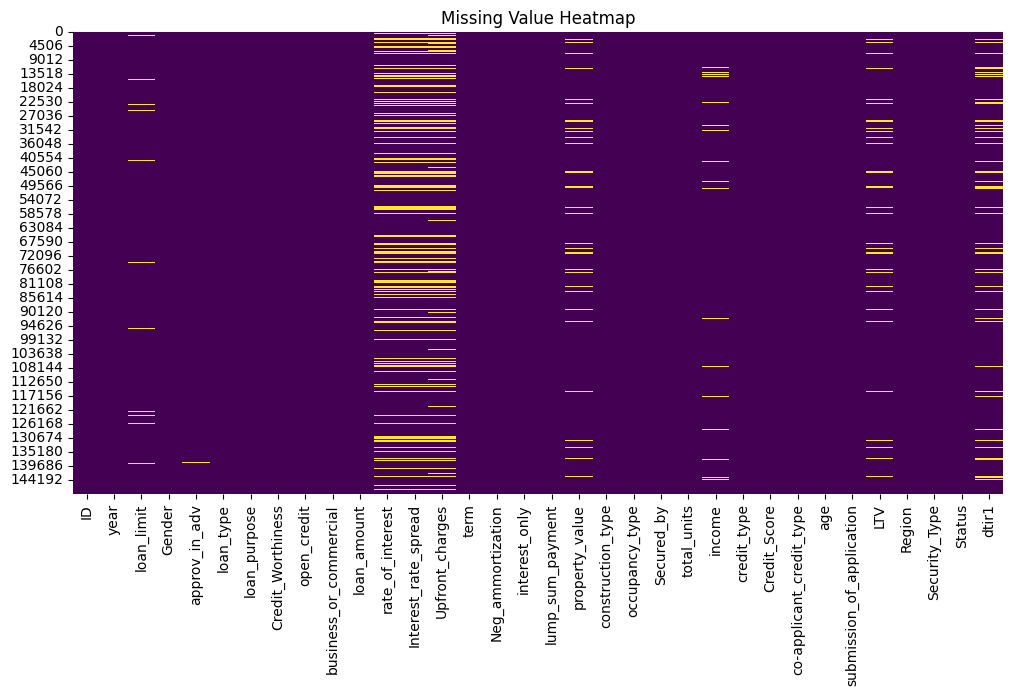

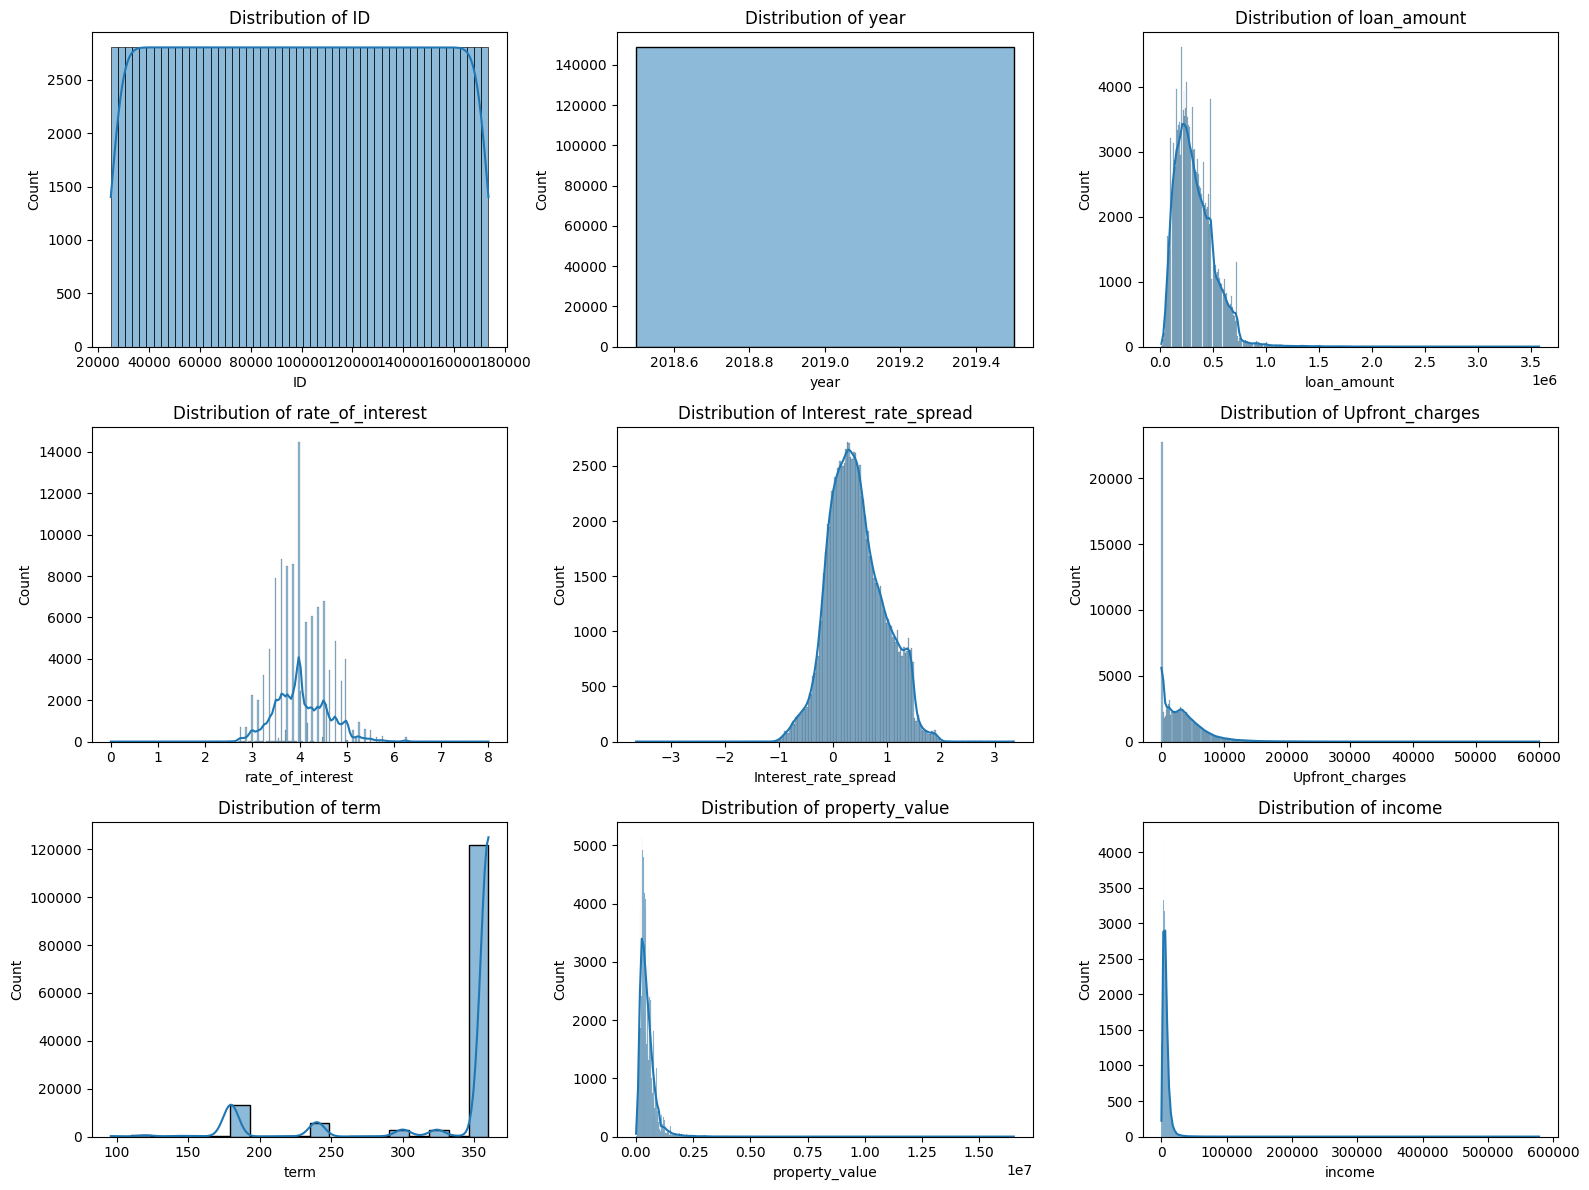

In [15]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Value Heatmap")
plt.show()

# ----- Numerical Columns -----
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Distribution Plots
plt.figure(figsize=(16, 12))
for i, col in enumerate(num_cols[:9]):     # top 9 numerical features
    plt.subplot(3, 3, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

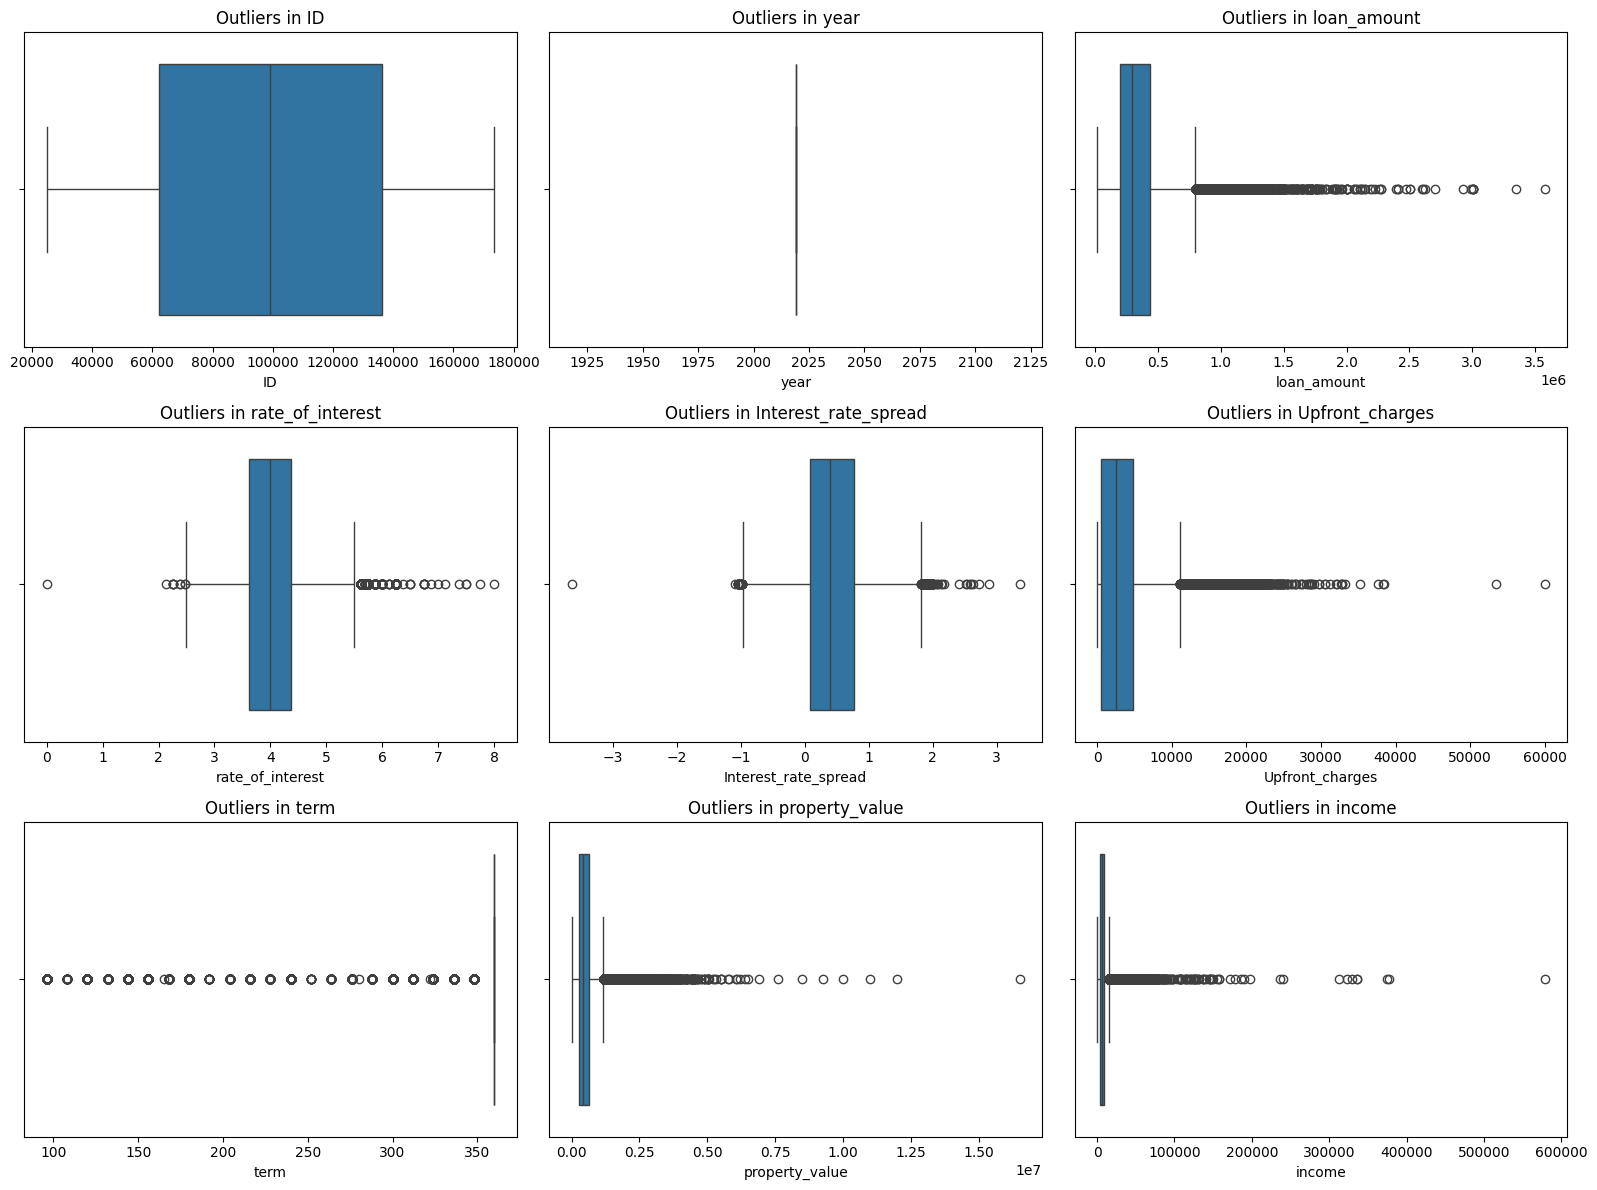

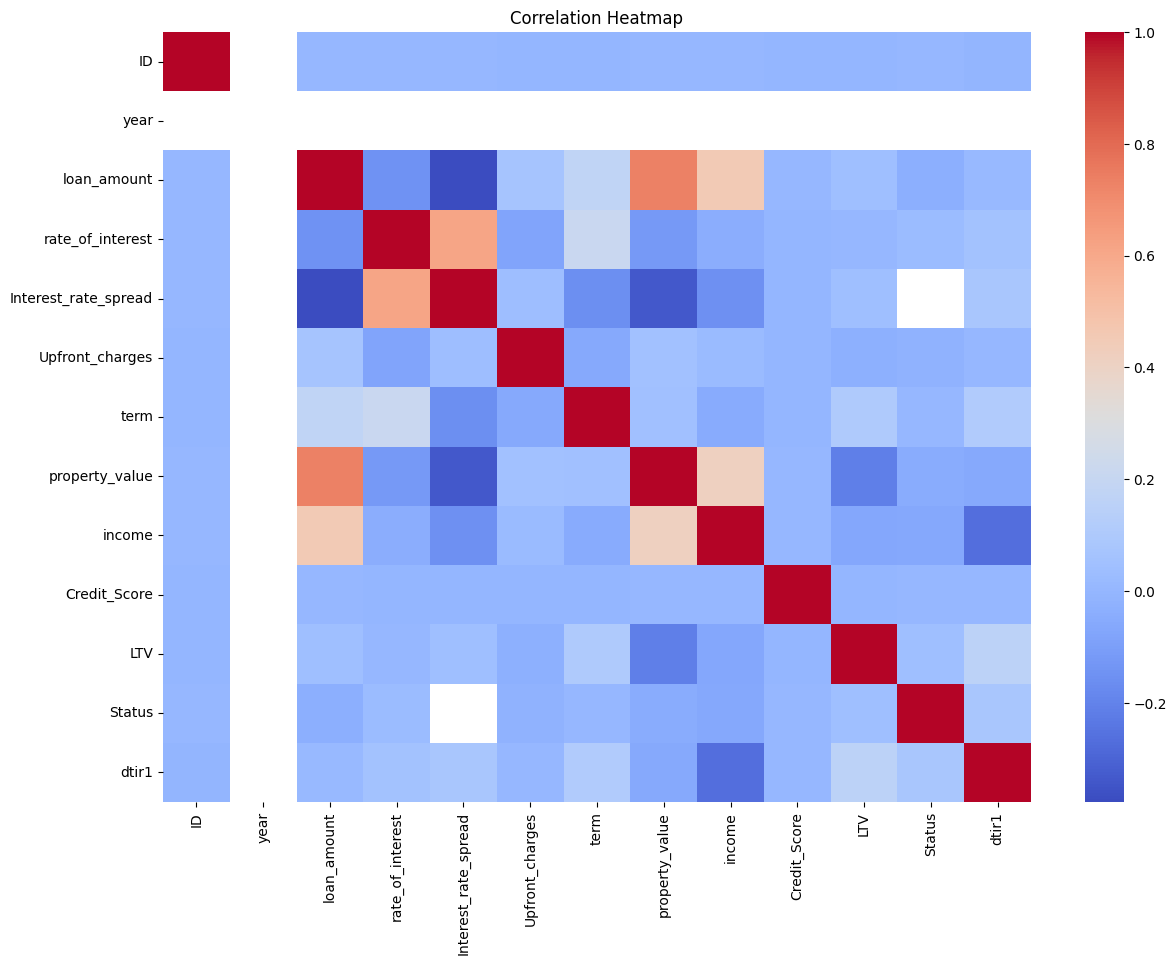

In [16]:
# Boxplots for Outliers
plt.figure(figsize=(16, 12))
for i, col in enumerate(num_cols[:9]):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x=df[col])
    plt.title(f"Outliers in {col}")
plt.tight_layout()
plt.show()

# ----- Correlation Heatmap -----
plt.figure(figsize=(14, 10))
corr = df[num_cols].corr()
sns.heatmap(corr, annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


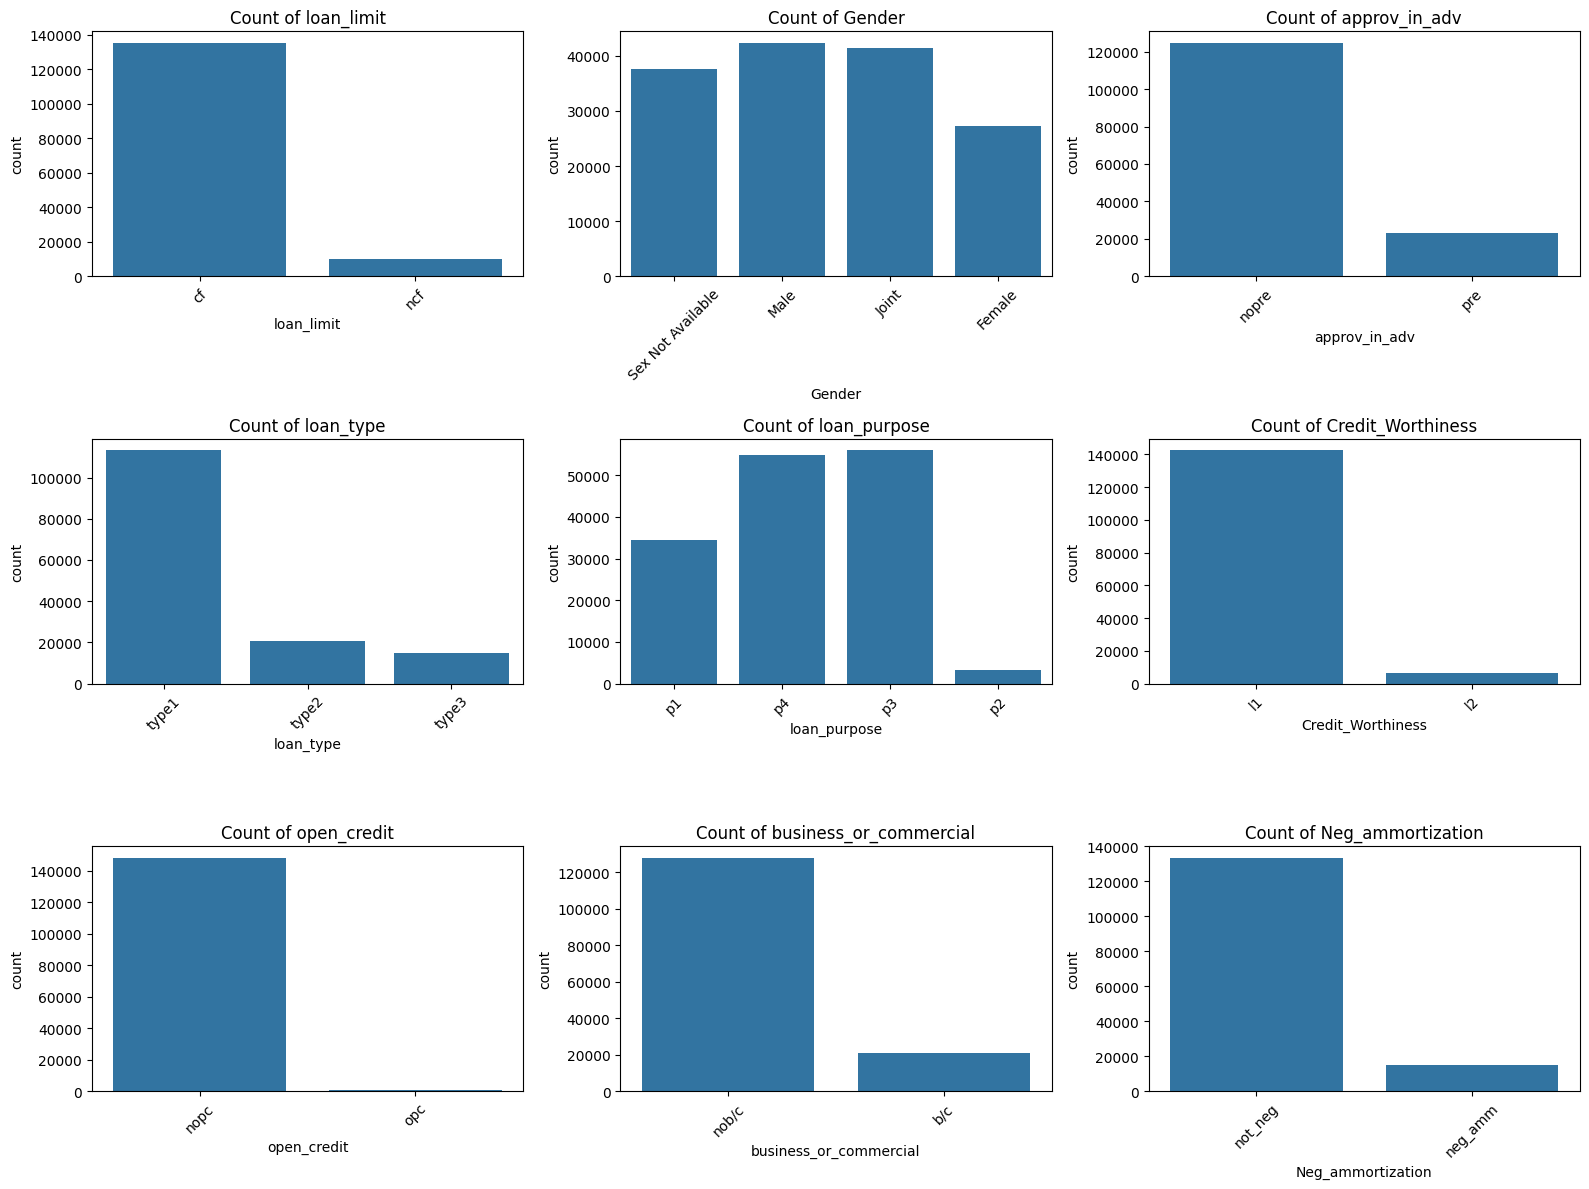

In [17]:
# ----- Categorical Columns -----
cat_cols = df.select_dtypes(include=['object']).columns

# Countplots
plt.figure(figsize=(16, 12))
for i, col in enumerate(cat_cols[:9]):   # only first 9 categorical
    plt.subplot(3, 3, i+1)
    sns.countplot(data=df, x=col)
    plt.xticks(rotation=45)
    plt.title(f"Count of {col}")
plt.tight_layout()
plt.show()


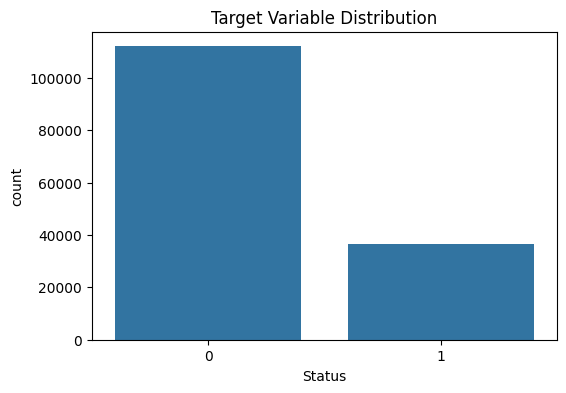

In [18]:
# ----- Target Variable Analysis -----
plt.figure(figsize=(6,4))
sns.countplot(x=df['Status'])
plt.title("Target Variable Distribution")
plt.show()


Status
0    112031
1     36639
Name: count, dtype: int64


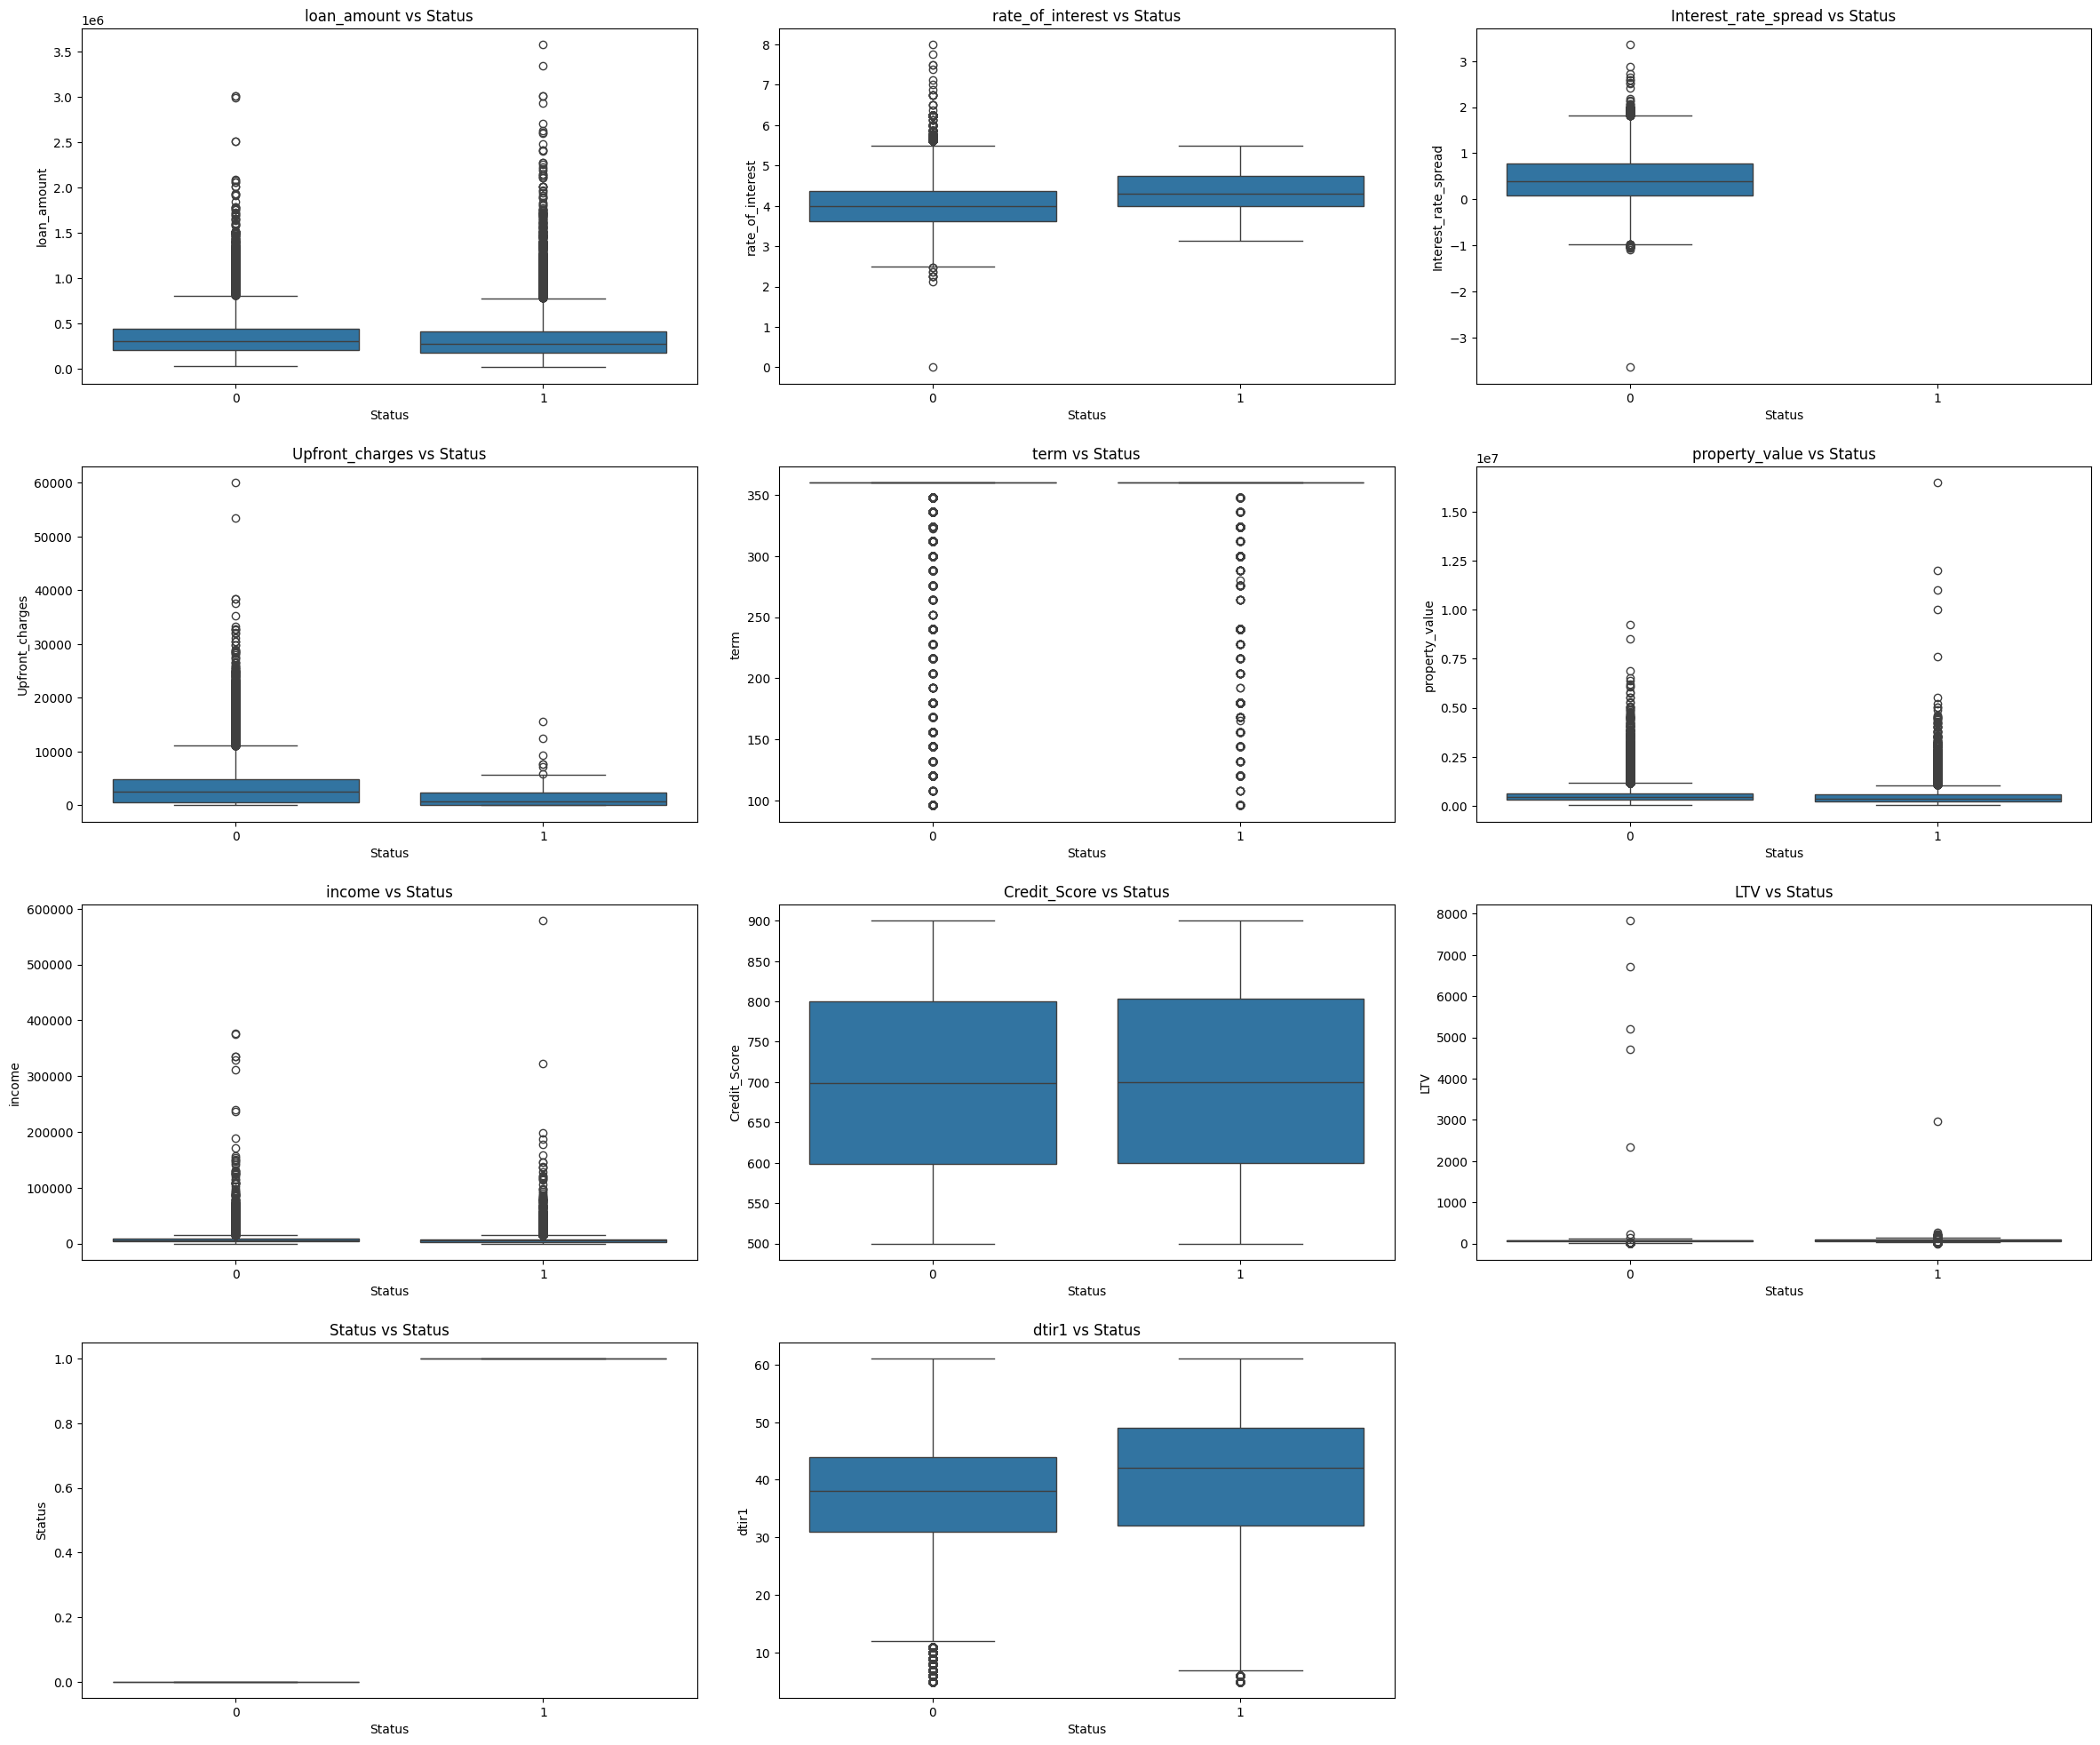

In [19]:
# Make a clean copy ONLY for plotting
df_plot = pd.read_csv("./Loan_Default.csv")

# Reconvert Status to numeric
df_plot['Status'] = df_plot['Status'].astype(int)

print(df_plot['Status'].value_counts())
# Select numerical columns (fresh, unscaled)
num_cols = df_plot.select_dtypes(include=['int64', 'float64']).columns

# Remove ID and year if they exist
num_cols = [c for c in num_cols if c not in ['ID', 'year']]

# Number of numeric features
n = len(num_cols)

# Calculate grid size (3 columns per row)
cols = 3
rows = (n + cols - 1) // cols   # ceiling division

plt.figure(figsize=(24, rows * 5))   # auto height based on number of rows

for i, col in enumerate(num_cols, start=1):
    plt.subplot(rows, cols, i)
    sns.boxplot(x=df_plot['Status'], y=df_plot[col])
    plt.title(f"{col} vs Status")
    plt.xlabel("Status")
    plt.ylabel(col)

plt.tight_layout(pad=2)
plt.show()



/tmp/ipython-input-843897457.py:5: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df_plot, x=col, hue="Status", fill=True)


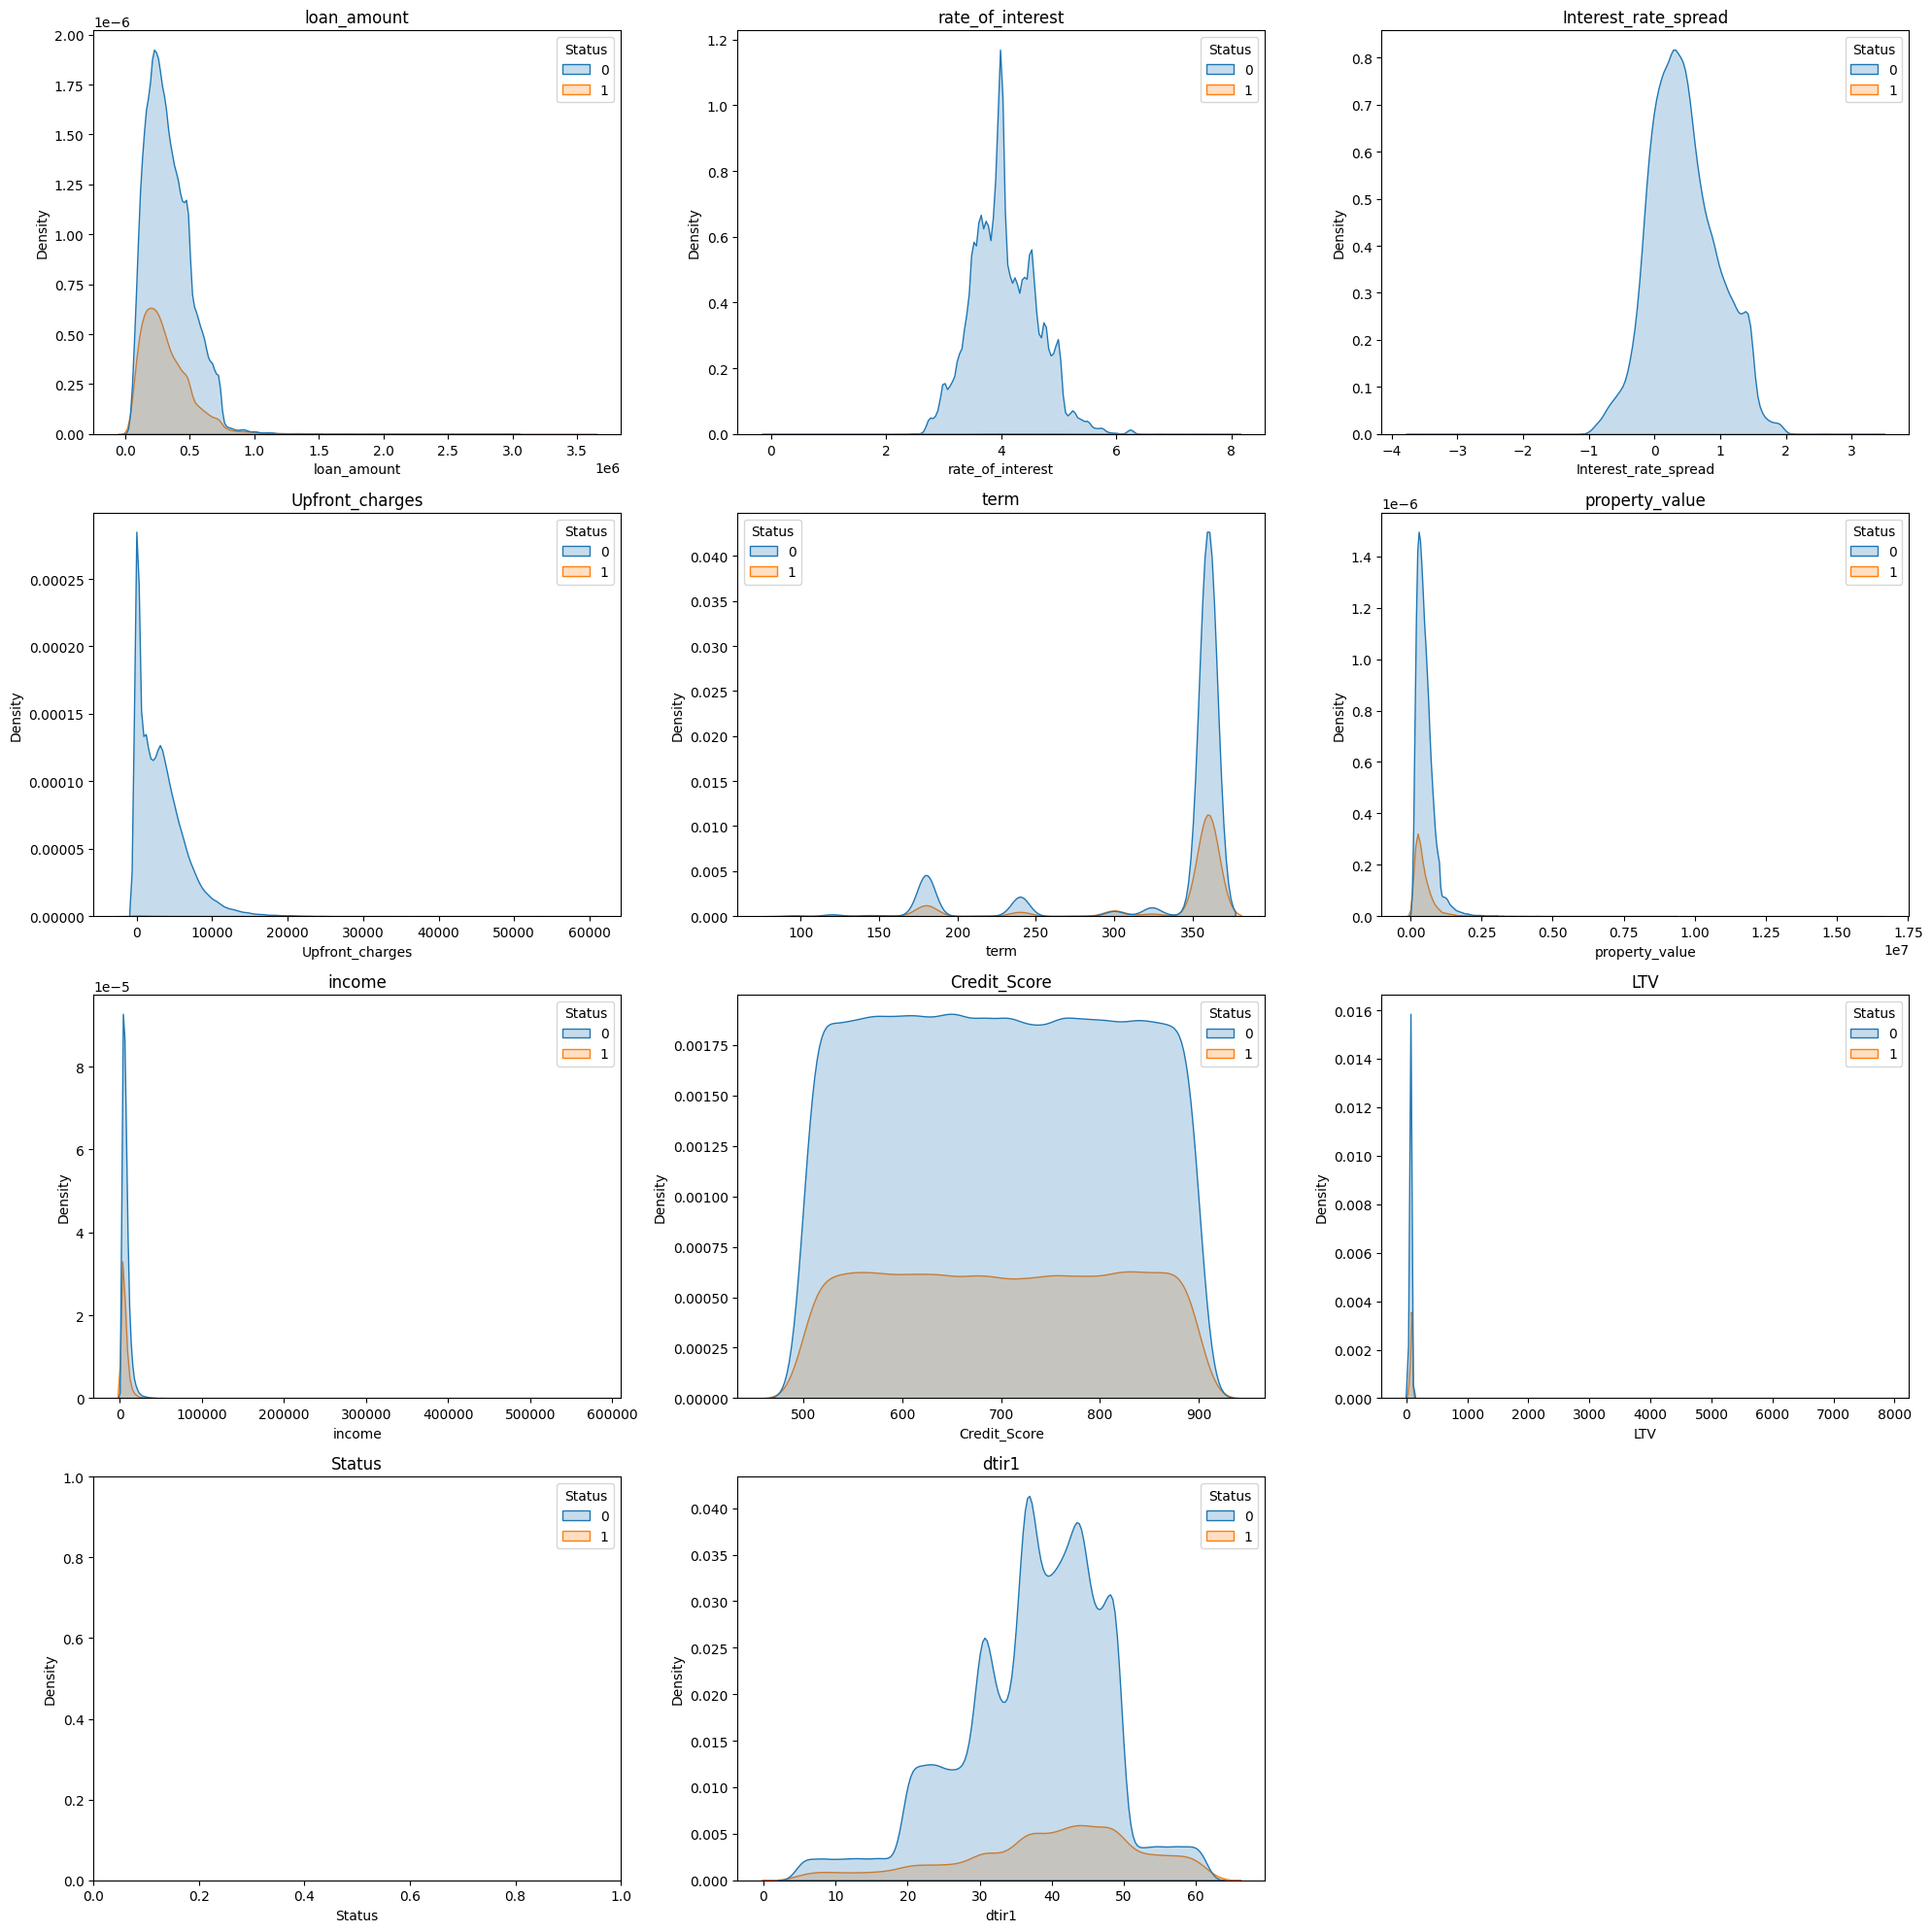

In [20]:
plt.figure(figsize=(20, 20))

for i, col in enumerate(num_cols):
    plt.subplot(4, 3, i+1)
    sns.kdeplot(data=df_plot, x=col, hue="Status", fill=True)
    plt.title(f"{col}")

plt.tight_layout()
plt.show()


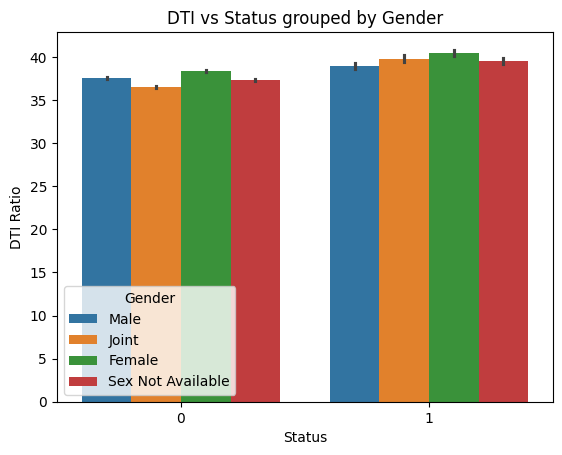

In [21]:
sns.barplot(
    data=df_plot,
    x="Status",
    y=col,
    hue='Gender'
)
plt.ylabel("DTI Ratio")
plt.title("DTI vs Status grouped by Gender")
plt.show()

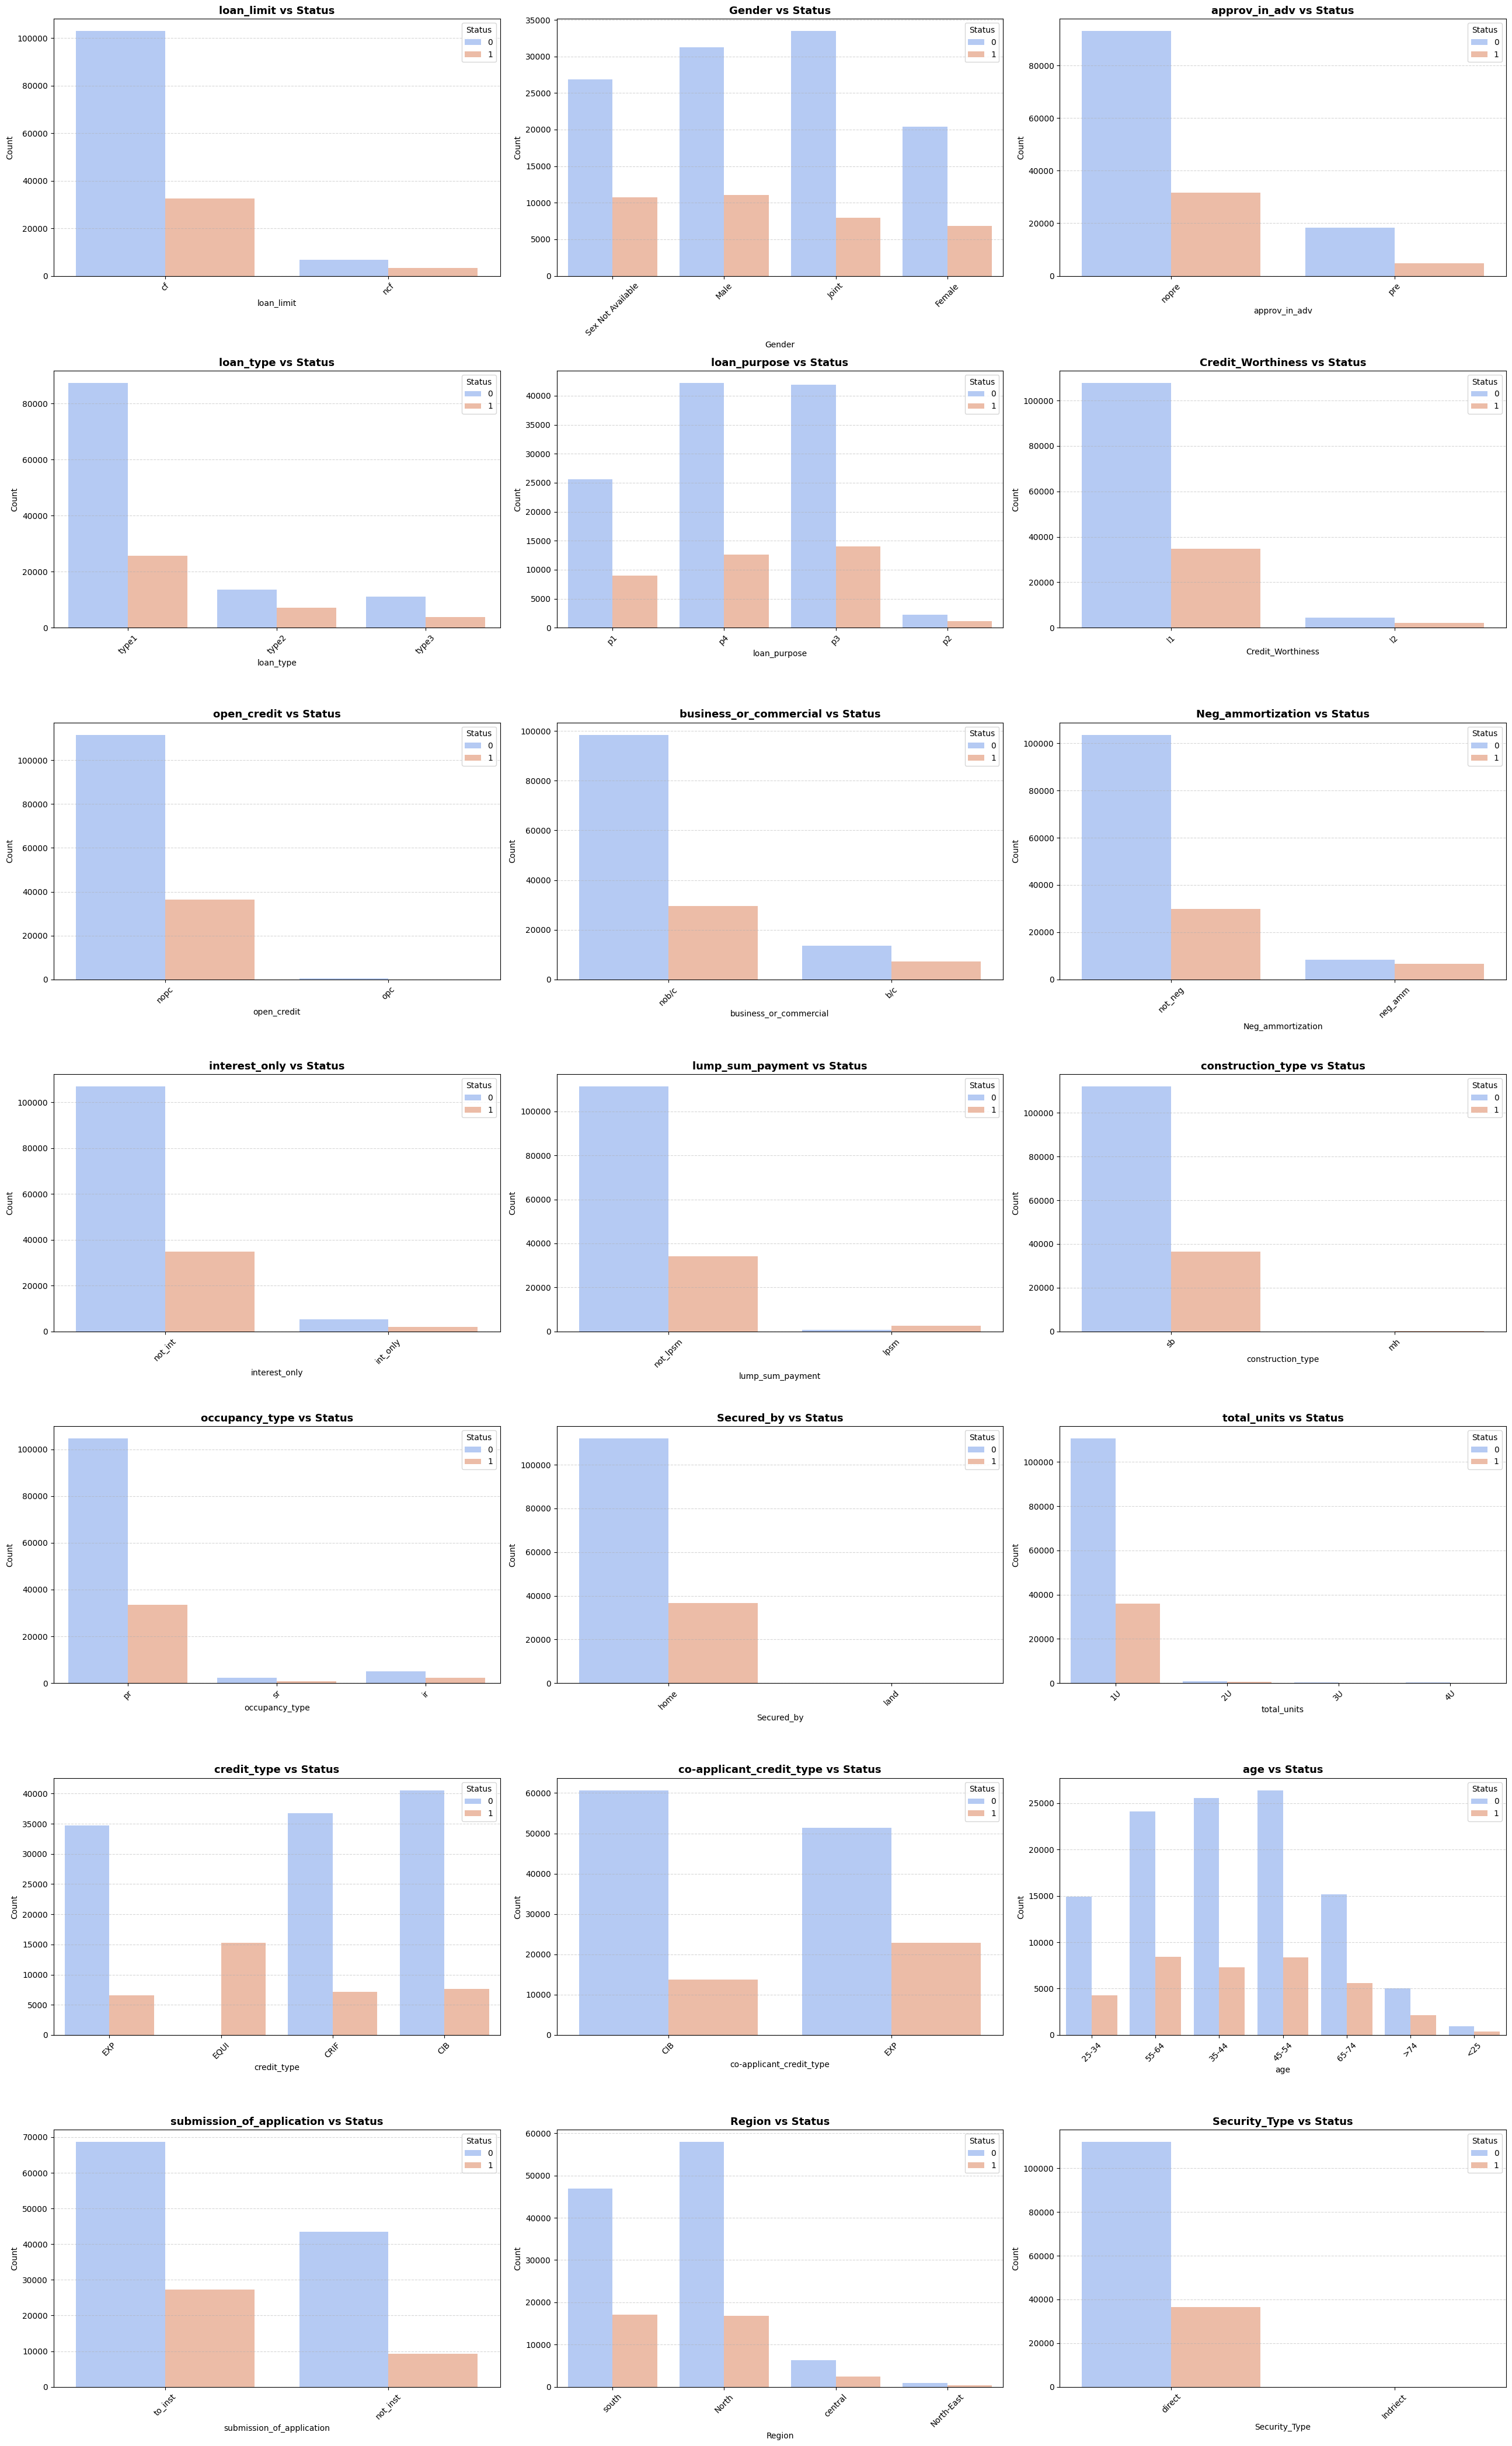

In [22]:
# Select categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

df['Status'] = df['Status'].astype(int)

# Grid configuration
cols = 3                     # 3 plots per row
rows = (len(categorical_cols) + cols - 1) // cols   # auto rows (~6 for 17 features)

plt.figure(figsize=(26, rows * 6))   # wide enough + good height per row

for i, col in enumerate(categorical_cols, start=1):
    plt.subplot(rows, cols, i)
    sns.countplot(data=df, x=col, hue='Status', palette='coolwarm')
    plt.title(f"{col} vs Status", fontsize=13, fontweight='bold')
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


### Missing Values in Numerical Columns handled using Simple Imputer

In [23]:
simple_imputer = SimpleImputer(strategy='median')
cols_to_impute = missing_precentage_num_df[missing_precentage_num_df >0].keys()
temp = df[cols_to_impute]
X_imputed = simple_imputer.fit_transform(temp)

num_df_imputed = pd.DataFrame(
    X_imputed,
    columns=cols_to_impute,
)

num_df[cols_to_impute] = num_df_imputed
df[num_df.columns] = num_df
df.isnull().sum()

,0
ID,0
year,0
loan_limit,3344
Gender,0
approv_in_adv,908
loan_type,0
loan_purpose,134
Credit_Worthiness,0
open_credit,0
business_or_commercial,0


In [24]:
num_df_cols= num_df.select_dtypes(include=['int64', 'float64']).columns

skewness =num_df[num_df_cols].skew().sort_values(ascending=False)
print("Skewness for numerical columns:\n", skewness)

Skewness for numerical columns:
 LTV                     127.161038
income                   17.844998
property_value            4.872330
Upfront_charges           2.194930
loan_amount               1.666998
Status                    1.176762
rate_of_interest          0.528626
Interest_rate_spread      0.406874
Credit_Score              0.004767
year                      0.000000
ID                        0.000000
dtir1                    -0.663857
term                     -2.175290
dtype: float64


### Skewness Transformation

In [25]:
skewed_cols = skewness[(skewness < -1) | (skewness > 1)].index.tolist()
print("\nColumns to log-transform (skewness < -1 or > 1):", list(skewed_cols))
# skewed_cols = skewed_cols.remove()


for col in skewed_cols:
    if skewness[col] > 1 and col != 'Status':  # positively skewed
        num_df[col] = np.log1p(num_df[col])
    elif skewness[col] < -1  and col != 'Status':  # negatively skewed
        num_df[col] = np.log1p(num_df[col].max() + 1 - num_df[col])

skewness_after = num_df[skewed_cols].skew()
print("\nSkewness after log transformation:\n", skewness_after)


Columns to log-transform (skewness < -1 or > 1): ['LTV', 'income', 'property_value', 'Upfront_charges', 'loan_amount', 'Status', 'term']

Skewness after log transformation:
 LTV               -2.139832
income            -5.266832
property_value    -0.070577
Upfront_charges   -1.790133
loan_amount       -0.396572
Status             1.176762
term               1.739486
dtype: float64


In [26]:
df[num_df.columns] = num_df

In [27]:
print(num_df['Status'].value_counts())

Status
0    112031
1     36639
Name: count, dtype: int64


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  float64
 11  rate_of_interest           148670 non-null  float64
 12  Interest_rate_spread       148670 non-null  float64
 13  Upfront_charges            14

In [29]:
cat_cols = df.select_dtypes(include=['object'])
print(cat_cols.isnull().sum().sort_values(ascending=False))
cat_cols = cat_cols.columns
cat_cols

loan_limit                   3344
approv_in_adv                 908
age                           200
submission_of_application     200
loan_purpose                  134
Neg_ammortization             121
Gender                          0
loan_type                       0
Credit_Worthiness               0
interest_only                   0
lump_sum_payment                0
open_credit                     0
business_or_commercial          0
occupancy_type                  0
construction_type               0
Secured_by                      0
total_units                     0
co-applicant_credit_type        0
credit_type                     0
Region                          0
Security_Type                   0
dtype: int64


Index(['loan_limit', 'Gender', 'approv_in_adv', 'loan_type', 'loan_purpose',
       'Credit_Worthiness', 'open_credit', 'business_or_commercial',
       'Neg_ammortization', 'interest_only', 'lump_sum_payment',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'credit_type', 'co-applicant_credit_type', 'age',
       'submission_of_application', 'Region', 'Security_Type'],
      dtype='object')

In [30]:
def type_transform(r):
  if r == 'type1':
    return 'Conventional Loans'
  elif r == 'type2':
    return 'Government-Backed Loans'
  elif r == 'type3':
    return 'Non-Conventional Loans'
  else:
    return r

def purpose_transform(r):
  if r == 'p1':
    return 'Home Purchase'
  elif r == 'p2':
    return 'Home Improvement'
  elif r == 'p3':
    return 'Refinancing'
  elif r == 'p4':
    return 'Investment Property'
  else:
    return r


df['loan_type'] = df['loan_type'].apply(type_transform)
df['loan_purpose'] = df['loan_purpose'].apply(purpose_transform)




### One Hot Encoding on the Categorical Columns

In [31]:
categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer([
    ('cat', categorical_transformer, cat_cols)
])


In [32]:
#Sampling 10% data from the original dataset in order to perform
#Hyperparameter tuning

sample_size = 15000
df_sampled = df.sample(n=sample_size, random_state=42)

X = df_sampled.drop(columns=['ID', 'year', 'Status'])
y = df_sampled['Status'].astype(int)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)
X_train_processed = scaler.fit_transform(X_train_processed)
X_test_processed = scaler.transform(X_test_processed)

In [33]:

# Using RandomizedSearchCV

from sklearn.model_selection import RandomizedSearchCV

# LOGISTIC REGRESSION TUNING
logreg_params = {
    'C': np.logspace(-3, 3, 20),
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

logreg_random = RandomizedSearchCV(
    LogisticRegression(max_iter=2000),
    param_distributions=logreg_params,
    n_iter=20,
    scoring='roc_auc',
    cv=5,
    random_state=42,
    n_jobs=-1
)

logreg_random.fit(X_train_processed, y_train)

print("\n=== Logistic Regression Best Params ===")
print(logreg_random.best_params_)
print("Best ROC AUC:", logreg_random.best_score_)



=== Logistic Regression Best Params ===
{'solver': 'liblinear', 'penalty': 'l1', 'C': np.float64(0.07847599703514611)}
Best ROC AUC: 0.8165083739954518


In [34]:

# RANDOM FOREST TUNING
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
}

rf_random = RandomizedSearchCV(
    RandomForestClassifier(random_state=42),
    param_distributions=rf_params,
    n_iter=10,
    scoring='roc_auc',
    cv=3,
    random_state=42,
    verbose=1
)

rf_random.fit(X_train_processed, y_train)

print("\n=== Random Forest Best Params ===")
print(rf_random.best_params_)
print("Best ROC AUC:", rf_random.best_score_)


Fitting 3 folds for each of 10 candidates, totalling 30 fits

=== Random Forest Best Params ===
{'n_estimators': 200, 'min_samples_split': 5, 'max_depth': 10}
Best ROC AUC: 0.8224044536367243


In [35]:

# XGBOOST TUNING
xgb_params = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 1, 5],
    'reg_lambda': [0.1, 1, 5]
}

xgb_random = RandomizedSearchCV(
    XGBClassifier(
        random_state=42,
        eval_metric='logloss',
        ),
    param_distributions=xgb_params,
    n_iter=20,
    scoring='roc_auc',
    cv=5,
    random_state=42,
    n_jobs=-1
)

xgb_random.fit(X_train_processed, y_train)

print("\n=== XGBoost Best Params ===")
print(xgb_random.best_params_)
print("Best ROC AUC:", xgb_random.best_score_)



=== XGBoost Best Params ===
{'subsample': 0.8, 'reg_lambda': 0.1, 'n_estimators': 300, 'max_depth': 7, 'learning_rate': 0.05, 'gamma': 5, 'colsample_bytree': 1.0}
Best ROC AUC: 0.8249188456254319


In [36]:

# TEST SET EVALUATION OF BEST MODELS

models = {
    "Logistic Regression": logreg_random.best_estimator_,
    "Random Forest": rf_random.best_estimator_,
    "XGBoost": xgb_random.best_estimator_
}

for name, model in models.items():
    y_pred = model.predict(X_test_processed)
    y_proba = model.predict_proba(X_test_processed)[:, 1]

    print(f"\n===== {name} Test Performance =====")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("ROC AUC:", roc_auc_score(y_test, y_proba))
    print("PR AUC:", average_precision_score(y_test, y_proba))
    print(classification_report(y_test, y_pred))


===== Logistic Regression Test Performance =====
Accuracy: 0.8666666666666667
ROC AUC: 0.8216040455331186
PR AUC: 0.7377063964088966
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      2288
           1       0.94      0.47      0.62       712

    accuracy                           0.87      3000
   macro avg       0.90      0.73      0.77      3000
weighted avg       0.88      0.87      0.85      3000


===== Random Forest Test Performance =====
Accuracy: 0.869
ROC AUC: 0.8272063698239962
PR AUC: 0.7464322424835689
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      2288
           1       0.97      0.46      0.63       712

    accuracy                           0.87      3000
   macro avg       0.91      0.73      0.77      3000
weighted avg       0.88      0.87      0.85      3000


===== XGBoost Test Performance =====
Accuracy: 0.869
ROC AUC: 0.8280215658639113
PR AUC: 0.74832

### Extracting the most important features

In [37]:
X_original = df.drop(columns=['ID', 'year', 'Status'])
y_original = df['Status'].astype(int)

In [38]:
feature_importances = xgb_random.best_estimator_.feature_importances_
feature_names = preprocessor.get_feature_names_out()

feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False).head(30)['Feature'].tolist()

print("Top 30 Most Important Features (XGBoost):")
print(feature_importance_df)

Top 30 Most Important Features (XGBoost):
['cat__credit_type_EQUI', 'cat__Neg_ammortization_neg_amm', 'cat__lump_sum_payment_lpsm', 'cat__Credit_Worthiness_l1', 'cat__submission_of_application_not_inst', 'cat__loan_purpose_Home Purchase', 'cat__loan_type_Government-Backed Loans', 'cat__occupancy_type_sr', 'cat__approv_in_adv_nopre', 'cat__interest_only_int_only', 'cat__occupancy_type_pr', 'cat__co-applicant_credit_type_CIB', 'cat__Gender_Joint', 'cat__loan_type_Non-Conventional Loans', 'cat__Gender_Male', 'cat__occupancy_type_ir', 'cat__Region_North-East', 'cat__total_units_1U', 'cat__loan_purpose_Refinancing', 'cat__total_units_2U', 'cat__credit_type_CRIF', 'cat__credit_type_EXP', 'cat__age_25-34', 'cat__loan_purpose_Investment Property', 'cat__Region_North', 'cat__credit_type_CIB', 'cat__loan_type_Conventional Loans', 'cat__loan_limit_cf', 'cat__Gender_Sex Not Available', 'cat__age_45-54']


### Under sampling the data for model training to take care of the class imbalance in 'Status' column

In [39]:
X_original = df.drop(columns=['ID', 'year', 'Status'])
y_original = df['Status'].astype(int)
from imblearn.under_sampling import RandomUnderSampler

## Only taking the important features
# print(X_original)

#Split dataset into training, validation, and test sets.
X_train_val, X_test, y_train_val, y_test = train_test_split( X_original, y_original, test_size=0.2, random_state=42, stratify=y_original)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42, stratify=y_train_val)

print("X_train",X_train.shape)

rus = RandomUnderSampler(sampling_strategy='majority', random_state=42)

X_train_res, y_train_res = rus.fit_resample(X_train, y_train)


print("X_train_resampled:", X_train_res.shape)
print("X_val:", X_val.shape)
print("X_test:", X_test.shape)

# Fit and transform on resampled training data
X_train_processed_array = preprocessor.fit_transform(X_train_res)
# Transform validation and test data
X_val_processed_array = preprocessor.transform(X_val)
X_test_processed_array = preprocessor.transform(X_test)

# Get feature names after preprocessing
feature_names_out = preprocessor.get_feature_names_out()

# Convert processed arrays to DataFrames with proper column names
X_train_processed = pd.DataFrame(X_train_processed_array, columns=feature_names_out)
X_val_processed = pd.DataFrame(X_val_processed_array, columns=feature_names_out)
X_test_processed = pd.DataFrame(X_test_processed_array, columns=feature_names_out)

print("X_train_resampled:", X_train_processed.shape)
print("X_val:", X_val_processed.shape)
print("X_test:", X_test_processed.shape)

# Now filter by feature_importance_df (which contains the names of the top features)
X_train_processed = X_train_processed[feature_importance_df].to_numpy()
X_val_processed = X_val_processed[feature_importance_df].to_numpy()
X_test_processed = X_test_processed[feature_importance_df].to_numpy()

print("\nShapes after converting to NumPy arrays and filtering:")
print("X_train_processed:", X_train_processed.shape)
print("X_val_processed:", X_val_processed.shape)
print("X_test_processed:", X_test_processed.shape)

X_train (89202, 31)
X_train_resampled: (43966, 31)
X_val: (29734, 31)
X_test: (29734, 31)
X_train_resampled: (43966, 59)
X_val: (29734, 59)
X_test: (29734, 59)

Shapes after converting to NumPy arrays and filtering:
X_train_processed: (43966, 30)
X_val_processed: (29734, 30)
X_test_processed: (29734, 30)


In [40]:
feature_names = preprocessor.get_feature_names_out()
print("Transformed Feature Names:")
print(feature_names[:10])
print(f"Total number of features: {len(feature_names)}")

Transformed Feature Names:
['cat__loan_limit_cf' 'cat__loan_limit_ncf' 'cat__Gender_Female'
 'cat__Gender_Joint' 'cat__Gender_Male' 'cat__Gender_Sex Not Available'
 'cat__approv_in_adv_nopre' 'cat__approv_in_adv_pre'
 'cat__loan_type_Conventional Loans'
 'cat__loan_type_Government-Backed Loans']
Total number of features: 59


## Logistic Regression Model


In [41]:
log_reg_model = LogisticRegression(
    solver='liblinear',
    penalty='l1',
    C=float(0.3359818286283781),
    max_iter=2000
)
log_reg_model.fit(X_train_processed, y_train_res)

y_pred_lr = log_reg_model.predict(X_test_processed)
y_pred_proba_lr = log_reg_model.predict_proba(X_test_processed)[:, 1]

print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))
print(f"Logistic Regression Accuracy Score: {accuracy_score(y_test, y_pred_lr)}")
print(f"Logistic Regression ROC AUC Score: {roc_auc_score(y_test, y_pred_proba_lr)}")
print(f"Logistic Regression Average Precision Score (PR AUC): {average_precision_score(y_test, y_pred_proba_lr)}")

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.89      0.88     22406
           1       0.65      0.63      0.64      7328

    accuracy                           0.82     29734
   macro avg       0.76      0.76      0.76     29734
weighted avg       0.82      0.82      0.82     29734

Logistic Regression Accuracy Score: 0.824712450393489
Logistic Regression ROC AUC Score: 0.8302345014075302
Logistic Regression Average Precision Score (PR AUC): 0.7544779359185663


#### Model Evaluation on the Validation Set

In [42]:
y_pred_lr_val = log_reg_model.predict(X_val_processed)
y_pred_proba_lr_val = log_reg_model.predict_proba(X_val_processed)[:, 1]

print("Logistic Regression Validation Classification Report:")
print(classification_report(y_val, y_pred_lr_val))
print(f"Logistic Regression Validation Accuracy Score: {accuracy_score(y_val, y_pred_lr_val)}")
print(f"Logistic Regression Validation ROC AUC Score: {roc_auc_score(y_val, y_pred_proba_lr_val)}")
print(f"Logistic Regression Validation Average Precision Score (PR AUC): {average_precision_score(y_val, y_pred_proba_lr_val)}")

Logistic Regression Validation Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.89      0.88     22406
           1       0.64      0.61      0.62      7328

    accuracy                           0.82     29734
   macro avg       0.76      0.75      0.75     29734
weighted avg       0.82      0.82      0.82     29734

Logistic Regression Validation Accuracy Score: 0.8188269321315665
Logistic Regression Validation ROC AUC Score: 0.8207795257294228
Logistic Regression Validation Average Precision Score (PR AUC): 0.7382134313491315


## Random Forest Classifier Model


In [43]:
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    min_samples_split=10,
    random_state=42
)
rf_model.fit(X_train_processed, y_train_res)

y_pred_rf = rf_model.predict(X_test_processed)
y_pred_proba_rf = rf_model.predict_proba(X_test_processed)[:, 1]

print("Random Forest Classifier Classification Report:")
print(classification_report(y_test, y_pred_rf))
print(f"Random Forest Classifier Accuracy Score: {accuracy_score(y_test, y_pred_rf)}")
print(f"Random Forest Classifier ROC AUC Score: {roc_auc_score(y_test, y_pred_proba_rf)}")
print(f"Random Forest Classifier Average Precision Score (PR AUC): {average_precision_score(y_test, y_pred_proba_rf)}")

Random Forest Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.91      0.90     22406
           1       0.70      0.62      0.66      7328

    accuracy                           0.84     29734
   macro avg       0.79      0.77      0.78     29734
weighted avg       0.84      0.84      0.84     29734

Random Forest Classifier Accuracy Score: 0.8405529024012914
Random Forest Classifier ROC AUC Score: 0.8391891213052336
Random Forest Classifier Average Precision Score (PR AUC): 0.7646276553157598


#### Model Evaluation on the Validation Set

In [44]:
y_pred_rf_val = rf_model.predict(X_val_processed)
y_pred_proba_rf_val = rf_model.predict_proba(X_val_processed)[:, 1]

print("Random Forest Classifier Validation Classification Report:")
print(classification_report(y_val, y_pred_rf_val))
print(f"Random Forest Classifier Validation Accuracy Score: {accuracy_score(y_val, y_pred_rf_val)}")
print(f"Random Forest Classifier Validation ROC AUC Score: {roc_auc_score(y_val, y_pred_proba_rf_val)}")
print(f"Random Forest Classifier Validation Average Precision Score (PR AUC): {average_precision_score(y_val, y_pred_proba_rf_val)}")

Random Forest Classifier Validation Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.91      0.89     22406
           1       0.69      0.59      0.64      7328

    accuracy                           0.83     29734
   macro avg       0.78      0.75      0.77     29734
weighted avg       0.83      0.83      0.83     29734

Random Forest Classifier Validation Accuracy Score: 0.8347010156722944
Random Forest Classifier Validation ROC AUC Score: 0.8291900725135227
Random Forest Classifier Validation Average Precision Score (PR AUC): 0.7489175602661318


#### Model Evaluation on the Validation Set

## XGBoost Classifier Model


In [45]:
xgb_model = XGBClassifier(
    n_estimators=200,
    max_depth=5,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.6,
    gamma=1,
    reg_lambda=1,
    objective='binary:logistic',
    eval_metric='logloss',
    random_state=42
)

xgb_model.fit(X_train_processed, y_train_res)

y_pred_xgb = xgb_model.predict(X_test_processed)
y_pred_proba_xgb = xgb_model.predict_proba(X_test_processed)[:, 1]

print("XGBoost Classifier Classification Report:")
print(classification_report(y_test, y_pred_xgb))
print(f"XGBoost Classifier Accuracy Score: {accuracy_score(y_test, y_pred_xgb)}")
print(f"XGBoost Classifier ROC AUC Score: {roc_auc_score(y_test, y_pred_proba_xgb)}")
print(f"XGBoost Classifier Average Precision Score (PR AUC): {average_precision_score(y_test, y_pred_proba_xgb)}")

XGBoost Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89     22406
           1       0.66      0.65      0.65      7328

    accuracy                           0.83     29734
   macro avg       0.77      0.77      0.77     29734
weighted avg       0.83      0.83      0.83     29734

XGBoost Classifier Accuracy Score: 0.8299253379969059
XGBoost Classifier ROC AUC Score: 0.8444040546687628
XGBoost Classifier Average Precision Score (PR AUC): 0.7697200565942978


#### Model Evaluation on the Validation Set

In [46]:
y_pred_xgb_val = xgb_model.predict(X_val_processed)
y_pred_proba_xgb_val = xgb_model.predict_proba(X_val_processed)[:, 1]

print("XGBoost Classifier Validation Classification Report:")
print(classification_report(y_val, y_pred_xgb_val))
print(f"XGBoost Classifier Validation Accuracy Score: {accuracy_score(y_val, y_pred_xgb_val)}")
print(f"XGBoost Classifier Validation ROC AUC Score: {roc_auc_score(y_val, y_pred_proba_xgb_val)}")
print(f"XGBoost Classifier Validation Average Precision Score (PR AUC): {average_precision_score(y_val, y_pred_proba_xgb_val)}")

XGBoost Classifier Validation Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.89      0.88     22406
           1       0.64      0.63      0.64      7328

    accuracy                           0.82     29734
   macro avg       0.76      0.76      0.76     29734
weighted avg       0.82      0.82      0.82     29734

XGBoost Classifier Validation Accuracy Score: 0.8226272953521222
XGBoost Classifier Validation ROC AUC Score: 0.8339308847598915
XGBoost Classifier Validation Average Precision Score (PR AUC): 0.7537559329866789


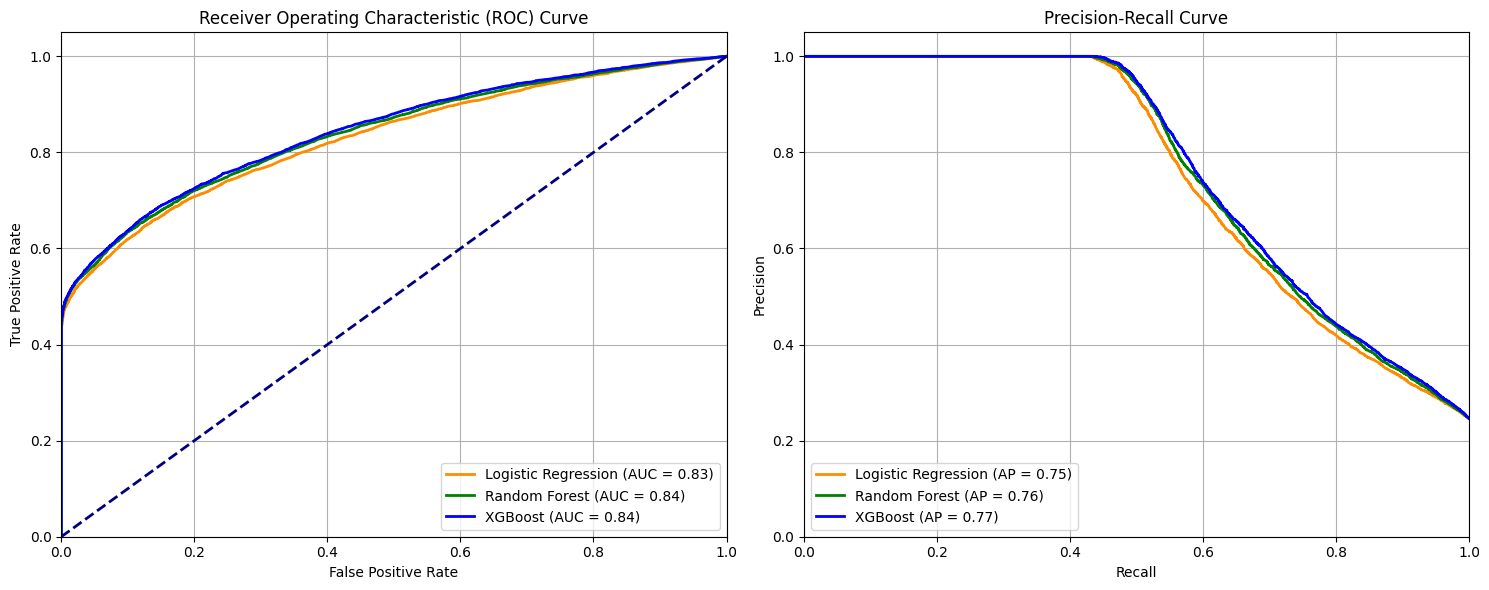

In [47]:
plt.figure(figsize=(15, 6))


plt.subplot(1, 2, 1)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_proba_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)
plt.plot(fpr_lr, tpr_lr, color='darkorange', lw=2, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')

fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_proba_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)
plt.plot(fpr_xgb, tpr_xgb, color='blue', lw=2, label=f'XGBoost (AUC = {roc_auc_xgb:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)

plt.subplot(1, 2, 2)
precision_lr, recall_lr, _ = precision_recall_curve(y_test, y_pred_proba_lr)
plt.plot(recall_lr, precision_lr, color='darkorange', lw=2, label=f'Logistic Regression (AP = {average_precision_score(y_test, y_pred_proba_lr):.2f})')

precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_pred_proba_rf)
plt.plot(recall_rf, precision_rf, color='green', lw=2, label=f'Random Forest (AP = {average_precision_score(y_test, y_pred_proba_rf):.2f})')

precision_xgb, recall_xgb, _ = precision_recall_curve(y_test, y_pred_proba_xgb)
plt.plot(recall_xgb, precision_xgb, color='blue', lw=2, label=f'XGBoost (AP = {average_precision_score(y_test, y_pred_proba_xgb):.2f})')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.grid(True)

plt.tight_layout()
plt.show()

## Evaluate and Compare Models


## Summary:

The best-performing model among Logistic Regression, Random Forest Classifier, and XGBoost Classifier is the **XGBoost Classifier**. It consistently showed the highest scores across all key evaluation metrics (Accuracy, ROC AUC, and PR AUC) on the test set.

### Data Analysis Key Findings
*   **Logistic Regression Model Performance:**
    *   Achieved an accuracy of approximately 0.867.
    *   Had a ROC AUC score of 0.831.
    *   Exhibited a PR AUC score of 0.757.
    *   Showed high precision (0.86) and recall (0.99) for Class 0, but lower recall (0.49) for Class 1.
*   **Random Forest Classifier Model Performance:**
    *   Recorded an accuracy of approximately 0.855.
    *   Had a ROC AUC score of 0.806.
    *   Displayed a PR AUC score of 0.735.
    *   Performance was slightly lower than Logistic Regression across these key metrics.
*   **XGBoost Classifier Model Performance:**
    *   Achieved the highest accuracy among the three models at approximately 0.869.
    *   Secured the highest ROC AUC score of 0.842.
    *   Obtained the highest PR AUC score of 0.768.
    *   The ROC and Precision-Recall curves visually confirmed XGBoost's superior performance, generally positioning above the other two models.
*   **Model Comparison:** XGBoost Classifier outperformed both Logistic Regression and Random Forest Classifier in terms of Accuracy, ROC AUC, and PR AUC, indicating its strongest ability to classify both positive and negative cases and discriminate between classes.